# ASCII rendering of webcam feed

In [3]:
import cv2
import numpy as np
import matplotlib as plt
from PIL import ImageFont, ImageDraw, Image
import matplotlib.pyplot as plt
from webcam import stopButton, view
import threading

## Generate the character gray scale

Here, I plot every character in an image and measure the color density as $\frac{# pixels drawn}{total # pixels}$. I will use japanese characters as they are squared (unlike alphabet). I use the list of [jouyou characters](http://nihongo.monash.edu/jouyoukanji.html) (~1000 most basic Kanjis), plus punctuation.

### Setup images and font

In [75]:
width = 256
height = 256
channel = 3
fontpath = "./ShipporiMincho-Regular.ttf" # <== 这里是宋体路径 
font = ImageFont.truetype(fontpath, height)
# cv2.putText(img,"a", (int(width/2),int(height/2)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 1)

In [76]:
kanjis = [
    "　", "。", "、", "；", "：", "・", "「", "｜", "（", "『", "〜", "ー",
    "一", "九", "七", "二", "人", "入", "八", "力", "十", "下", "三", "千", "上", "口", "土", "夕", "大", "女", "子", "小", "山", "川", "五", "天", "中", "六", "円", "手", "文", "日", "月", "木", "水", "火", "犬", "王", "正", "出", "本", "右", "四", "左", "玉", "生", "田", "白", "目", "石", "立", "百", "年", "休", "先", "名", "字", "早", "気", "竹", "糸", "耳", "虫", "村", "男", "町", "花", "見", "貝", "赤", "足", "車", "学", "林", "空", "金", "雨", "青", "草", "音", "校", "森",
    "刀", "万", "丸", "才", "工", "弓", "内", "午", "少", "元", "今", "公", "分", "切", "友", "太", "引", "心", "戸", "方", "止", "毛", "父", "牛", "半", "市", "北", "古", "台", "兄", "冬", "外", "広", "母", "用", "矢", "交", "会", "合", "同", "回", "寺", "地", "多", "光", "当", "毎", "池", "米", "羽", "考", "肉", "自", "色", "行", "西", "来", "何", "作", "体", "弟", "図", "声", "売", "形", "汽", "社", "角", "言", "谷", "走", "近", "里", "麦", "画", "東", "京", "夜", "直", "国", "姉", "妹", "岩", "店", "明", "歩", "知", "長", "門", "昼", "前", "南", "点", "室", "後", "春", "星", "海", "活", "思", "科", "秋", "茶", "計", "風", "食", "首", "夏", "弱", "原", "家", "帰", "時", "紙", "書", "記", "通", "馬", "高", "強", "教", "理", "細", "組", "船", "週", "野", "雪", "魚", "鳥", "黄", "黒", "場", "晴", "答", "絵", "買", "朝", "道", "番", "間", "雲", "園", "数", "新", "楽", "話", "遠", "電", "鳴", "歌", "算", "語", "読", "聞", "線", "親", "頭", "曜", "顔",
    "丁", "予", "化", "区", "反", "央", "平", "申", "世", "由", "氷", "主", "仕", "他", "代", "写", "号", "去", "打", "皮", "皿", "礼", "両", "曲", "向", "州", "全", "次", "安", "守", "式", "死", "列", "羊", "有", "血", "住", "助", "医", "君", "坂", "局", "役", "投", "対", "決", "究", "豆", "身", "返", "表", "事", "育", "使", "命", "味", "幸", "始", "実", "定", "岸", "所", "放", "昔", "板", "泳", "注", "波", "油", "受", "物", "具", "委", "和", "者", "取", "服", "苦", "重", "乗", "係", "品", "客", "県", "屋", "炭", "度", "待", "急", "指", "持", "拾", "昭", "相", "柱", "洋", "畑", "界", "発", "研", "神", "秒", "級", "美", "負", "送", "追", "面", "島", "勉", "倍", "真", "員", "宮", "庫", "庭", "旅", "根", "酒", "消", "流", "病", "息", "荷", "起", "速", "配", "院", "悪", "商", "動", "宿", "帳", "族", "深", "球", "祭", "第", "笛", "終", "習", "転", "進", "都", "部", "問", "章", "寒", "暑", "植", "温", "湖", "港", "湯", "登", "短", "童", "等", "筆", "着", "期", "勝", "葉", "落", "軽", "運", "遊", "開", "階", "陽", "集", "悲", "飲", "歯", "業", "感", "想", "暗", "漢", "福", "詩", "路", "農", "鉄", "意", "様", "緑", "練", "銀", "駅", "鼻", "横", "箱", "談", "調", "橋", "整", "薬", "館", "題",
    "士", "不", "夫", "欠", "氏", "民", "史", "必", "失", "包", "末", "未", "以", "付", "令", "加", "司", "功", "札", "辺", "印", "争", "仲", "伝", "共", "兆", "各", "好", "成", "灯", "老", "衣", "求", "束", "兵", "位", "低", "児", "冷", "別", "努", "労", "告", "囲", "完", "改", "希", "折", "材", "利", "臣", "良", "芸", "初", "果", "刷", "卒", "念", "例", "典", "周", "協", "参", "固", "官", "底", "府", "径", "松", "毒", "泣", "治", "法", "牧", "的", "季", "英", "芽", "単", "省", "変", "信", "便", "軍", "勇", "型", "建", "昨", "栄", "浅", "胃", "祝", "紀", "約", "要", "飛", "候", "借", "倉", "孫", "案", "害", "帯", "席", "徒", "挙", "梅", "残", "殺", "浴", "特", "笑", "粉", "料", "差", "脈", "航", "訓", "連", "郡", "巣", "健", "側", "停", "副", "唱", "堂", "康", "得", "救", "械", "清", "望", "産", "菜", "票", "貨", "敗", "陸", "博", "喜", "順", "街", "散", "景", "最", "量", "満", "焼", "然", "無", "給", "結", "覚", "象", "貯", "費", "達", "隊", "飯", "働", "塩", "戦", "極", "照", "愛", "節", "続", "置", "腸", "辞", "試", "歴", "察", "旗", "漁", "種", "管", "説", "関", "静", "億", "器", "賞", "標", "熱", "養", "課", "輪", "選", "機", "積", "録", "観", "類", "験", "願", "鏡", "競", "議",
    "久", "仏", "支", "比", "可", "旧", "永", "句", "圧", "弁", "布", "刊", "犯", "示", "再", "仮", "件", "任", "因", "団", "在", "舌", "似", "余", "判", "均", "志", "条", "災", "応", "序", "快", "技", "状", "防", "武", "承", "価", "舎", "券", "制", "効", "妻", "居", "往", "性", "招", "易", "枝", "河", "版", "肥", "述", "非", "保", "厚", "故", "政", "査", "独", "祖", "則", "逆", "退", "迷", "限", "師", "個", "修", "俵", "益", "能", "容", "恩", "格", "桜", "留", "破", "素", "耕", "財", "造", "率", "貧", "基", "婦", "寄", "常", "張", "術", "情", "採", "授", "接", "断", "液", "混", "現", "略", "眼", "務", "移", "経", "規", "許", "設", "責", "険", "備", "営", "報", "富", "属", "復", "提", "検", "減", "測", "税", "程", "絶", "統", "証", "評", "賀", "貸", "貿", "過", "勢", "幹", "準", "損", "禁", "罪", "義", "群", "墓", "夢", "解", "豊", "資", "鉱", "預", "飼", "像", "境", "増", "徳", "慣", "態", "構", "演", "精", "総", "綿", "製", "複", "適", "酸", "銭", "銅", "際", "雑", "領", "導", "敵", "暴", "潔", "確", "編", "賛", "質", "興", "衛", "燃", "築", "輸", "績", "講", "謝", "織", "職", "額", "識", "護",
    "亡", "寸", "己", "干", "仁", "尺", "片", "冊", "収", "処", "幼", "庁", "穴", "危", "后", "灰", "吸", "存", "宇", "宅", "机", "至", "否", "我", "系", "卵", "忘", "孝", "困", "批", "私", "乱", "垂", "乳", "供", "並", "刻", "呼", "宗", "宙", "宝", "届", "延", "忠", "拡", "担", "拝", "枚", "沿", "若", "看", "城", "奏", "姿", "宣", "専", "巻", "律", "映", "染", "段", "洗", "派", "皇", "泉", "砂", "紅", "背", "肺", "革", "蚕", "値", "俳", "党", "展", "座", "従", "株", "将", "班", "秘", "純", "納", "胸", "朗", "討", "射", "針", "降", "除", "陛", "骨", "域", "密", "捨", "推", "探", "済", "異", "盛", "視", "窓", "翌", "脳", "著", "訪", "訳", "欲", "郷", "郵", "閉", "頂", "就", "善", "尊", "割", "創", "勤", "裁", "揮", "敬", "晩", "棒", "痛", "筋", "策", "衆", "装", "補", "詞", "貴", "裏", "傷", "暖", "源", "聖", "盟", "絹", "署", "腹", "蒸", "幕", "誠", "賃", "疑", "層", "模", "穀", "磁", "暮", "誤", "誌", "認", "閣", "障", "劇", "権", "潮", "熟", "蔵", "諸", "誕", "論", "遺", "奮", "憲", "操", "樹", "激", "糖", "縦", "鋼", "厳", "優", "縮", "覧", "簡", "臨", "難", "臓", "警",
    "乙", "了", "又", "与", "及", "丈", "刃", "凡", "勺", "互", "弔", "井", "升", "丹", "乏", "匁", "屯", "介", "冗", "凶", "刈", "匹", "厄", "双", "孔", "幻", "斗", "斤", "且", "丙", "甲", "凸", "丘", "斥", "仙", "凹", "召", "巨", "占", "囚", "奴", "尼", "巧", "払", "汁", "玄", "甘", "矛", "込", "弐", "朱", "吏", "劣", "充", "妄", "企", "仰", "伐", "伏", "刑", "旬", "旨", "匠", "叫", "吐", "吉", "如", "妃", "尽", "帆", "忙", "扱", "朽", "朴", "汚", "汗", "江", "壮", "缶", "肌", "舟", "芋", "芝", "巡", "迅", "亜", "更", "寿", "励", "含", "佐", "伺", "伸", "但", "伯", "伴", "呉", "克", "却", "吟", "吹", "呈", "壱", "坑", "坊", "妊", "妨", "妙", "肖", "尿", "尾", "岐", "攻", "忌", "床", "廷", "忍", "戒", "戻", "抗", "抄", "択", "把", "抜", "扶", "抑", "杉", "沖", "沢", "沈", "没", "妥", "狂", "秀", "肝", "即", "芳", "辛", "迎", "邦", "岳", "奉", "享", "盲", "依", "佳", "侍", "侮", "併", "免", "刺", "劾", "卓", "叔", "坪", "奇", "奔", "姓", "宜", "尚", "屈", "岬", "弦", "征", "彼", "怪", "怖", "肩", "房", "押", "拐", "拒", "拠", "拘", "拙", "拓", "抽", "抵", "拍", "披", "抱", "抹", "昆", "昇", "枢", "析", "杯", "枠", "欧", "肯", "殴", "況", "沼", "泥", "泊", "泌", "沸", "泡", "炎", "炊", "炉", "邪", "祈", "祉", "突", "肢", "肪", "到", "茎", "苗", "茂", "迭", "迫", "邸", "阻", "附", "斉", "甚", "帥", "衷", "幽", "為", "盾", "卑", "哀", "亭", "帝", "侯", "俊", "侵", "促", "俗", "盆", "冠", "削", "勅", "貞", "卸", "厘", "怠", "叙", "咲", "垣", "契", "姻", "孤", "封", "峡", "峠", "弧", "悔", "恒", "恨", "怒", "威", "括", "挟", "拷", "挑", "施", "是", "冒", "架", "枯", "柄", "柳", "皆", "洪", "浄", "津", "洞", "牲", "狭", "狩", "珍", "某", "疫", "柔", "砕", "窃", "糾", "耐", "胎", "胆", "胞", "臭", "荒", "荘", "虐", "訂", "赴", "軌", "逃", "郊", "郎", "香", "剛", "衰", "畝", "恋", "倹", "倒", "倣", "俸", "倫", "翁", "兼", "准", "凍", "剣", "剖", "脅", "匿", "栽", "索", "桑", "唆", "哲", "埋", "娯", "娠", "姫", "娘", "宴", "宰", "宵", "峰", "貢", "唐", "徐", "悦", "恐", "恭", "恵", "悟", "悩", "扇", "振", "捜", "挿", "捕", "敏", "核", "桟", "栓", "桃", "殊", "殉", "浦", "浸", "泰", "浜", "浮", "涙", "浪", "烈", "畜", "珠", "畔", "疾", "症", "疲", "眠", "砲", "祥", "称", "租", "秩", "粋", "紛", "紡", "紋", "耗", "恥", "脂", "朕", "胴", "致", "般", "既", "華", "蚊", "被", "託", "軒", "辱", "唇", "逝", "逐", "逓", "途", "透", "酌", "陥", "陣", "隻", "飢", "鬼", "剤", "竜", "粛", "尉", "彫", "偽", "偶", "偵", "偏", "剰", "勘", "乾", "喝", "啓", "唯", "執", "培", "堀", "婚", "婆", "寂", "崎", "崇", "崩", "庶", "庸", "彩", "患", "惨", "惜", "悼", "悠", "掛", "掘", "掲", "控", "据", "措", "掃", "排", "描", "斜", "旋", "曹", "殻", "貫", "涯", "渇", "渓", "渋", "淑", "渉", "淡", "添", "涼", "猫", "猛", "猟", "瓶", "累", "盗", "眺", "窒", "符", "粗", "粘", "粒", "紺", "紹", "紳", "脚", "脱", "豚", "舶", "菓", "菊", "菌", "虚", "蛍", "蛇", "袋", "訟", "販", "赦", "軟", "逸", "逮", "郭", "酔", "釈", "釣", "陰", "陳", "陶", "陪", "隆", "陵", "麻", "斎", "喪", "奥", "蛮", "偉", "傘", "傍", "普", "喚", "喫", "圏", "堪", "堅", "堕", "塚", "堤", "塔", "塀", "媒", "婿", "掌", "項", "幅", "帽", "幾", "廃", "廊", "弾", "尋", "御", "循", "慌", "惰", "愉", "惑", "雇", "扉", "握", "援", "換", "搭", "揚", "揺", "敢", "暁", "晶", "替", "棺", "棋", "棚", "棟", "款", "欺", "殖", "渦", "滋", "湿", "渡", "湾", "煮", "猶", "琴", "畳", "塁", "疎", "痘", "痢", "硬", "硝", "硫", "筒", "粧", "絞", "紫", "絡", "脹", "腕", "葬", "募", "裕", "裂", "詠", "詐", "詔", "診", "訴", "越", "超", "距", "軸", "遇", "遂", "遅", "遍", "酢", "鈍", "閑", "隅", "随", "焦", "雄", "雰", "殿", "棄", "傾", "傑", "債", "催", "僧", "慈", "勧", "載", "嗣", "嘆", "塊", "塑", "塗", "奨", "嫁", "嫌", "寛", "寝", "廉", "微", "慨", "愚", "愁", "慎", "携", "搾", "摂", "搬", "暇", "楼", "歳", "滑", "溝", "滞", "滝", "漠", "滅", "溶", "煙", "煩", "雅", "猿", "献", "痴", "睡", "督", "碁", "禍", "禅", "稚", "継", "腰", "艇", "蓄", "虞", "虜", "褐", "裸", "触", "該", "詰", "誇", "詳", "誉", "賊", "賄", "跡", "践", "跳", "較", "違", "遣", "酬", "酪", "鉛", "鉢", "鈴", "隔", "雷", "零", "靴", "頑", "頒", "飾", "飽", "鼓", "豪", "僕", "僚", "暦", "塾", "奪", "嫡", "寡", "寧", "腐", "彰", "徴", "憎", "慢", "摘", "概", "雌", "漆", "漸", "漬", "滴", "漂", "漫", "漏", "獄", "碑", "稲", "端", "箇", "維", "綱", "緒", "網", "罰", "膜", "慕", "誓", "誘", "踊", "遮", "遭", "酵", "酷", "銃", "銑", "銘", "閥", "隠", "需", "駆", "駄", "髪", "魂", "錬", "緯", "韻", "影", "鋭", "謁", "閲", "縁", "憶", "穏", "稼", "餓", "壊", "懐", "嚇", "獲", "穫", "潟", "轄", "憾", "歓", "環", "監", "緩", "艦", "還", "鑑", "輝", "騎", "儀", "戯", "擬", "犠", "窮", "矯", "響", "驚", "凝", "緊", "襟", "謹", "繰", "勲", "薫", "慶", "憩", "鶏", "鯨", "撃", "懸", "謙", "賢", "顕", "顧", "稿", "衡", "購", "墾", "懇", "鎖", "錯", "撮", "擦", "暫", "諮", "賜", "璽", "爵", "趣", "儒", "襲", "醜", "獣", "瞬", "潤", "遵", "償", "礁", "衝", "鐘", "壌", "嬢", "譲", "醸", "錠", "嘱", "審", "薪", "震", "錘", "髄", "澄", "瀬", "請", "籍", "潜", "繊", "薦", "遷", "鮮", "繕", "礎", "槽", "燥", "藻", "霜", "騒", "贈", "濯", "濁", "諾", "鍛", "壇", "鋳", "駐", "懲", "聴", "鎮", "墜", "締", "徹", "撤", "謄", "踏", "騰", "闘", "篤", "曇", "縄", "濃", "覇", "輩", "賠", "薄", "爆", "縛", "繁", "藩", "範", "盤", "罷", "避", "賓", "頻", "敷", "膚", "譜", "賦", "舞", "覆", "噴", "墳", "憤", "幣", "弊", "壁", "癖", "舗", "穂", "簿", "縫", "褒", "膨", "謀", "墨", "撲", "翻", "摩", "磨", "魔", "繭", "魅", "霧", "黙", "躍", "癒", "諭", "憂", "融", "慰", "窯", "謡", "翼", "羅", "頼", "欄", "濫", "履", "離", "慮", "寮", "療", "糧", "隣", "隷", "霊", "麗", "齢", "擁", "露"
]

In [77]:
density = np.zeros(len(kanjis))
for i, k in enumerate(kanjis):
    img = np.zeros((width,height,channel),dtype=np.uint8)*255
    img_pil = Image.fromarray(img)
    ImageDraw.Draw(img_pil).text((width/2, height/2),  k, font=font, fill = (1,1,1), anchor='mm')
    img = np.array(img_pil)
    density[i] = np.sum(img)/(width*height*channel)
#     plt.imshow(img)
density = density/np.max(density)*255.0

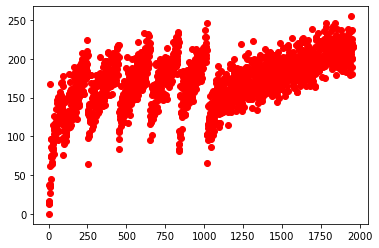

In [78]:
# np.min(density)
# np.sum(img)
plt.plot(density,'or')

In [79]:
# Create a dictionnary
dens2kanji = {}
for i in range(256):
    dens2kanji[i] = kanjis[np.argmin((density-i)**2)]

## Filter

In [89]:
def kanji_filter(img, fac=0.1):
    out_size = [int(img.shape[0]*fac), int(img.shape[1]*fac)]
    char_size = int(img.shape[0]/out_size[0])
    font = ImageFont.truetype(fontpath, char_size)
    img_in = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
    img_in = cv2.resize(img_in, dsize=[out_size[1], out_size[0]])

    img_out = np.zeros(img.shape,dtype=np.uint8)*255
    img_out = Image.fromarray(img_out)
    for i in range(out_size[0]):
        for j in range(out_size[1]):
            ImageDraw.Draw(img_out).text((j*char_size, i*char_size),  dens2kanji[img_in[i,j]], font=font, fill = (255,255,255), anchor='lt')
    return np.array(img_out)



## Display webcam feed and apply filterin notebook

In [86]:
stopButton.value=False
display(stopButton)            
thread = threading.Thread(target=view, args=(stopButton, kanji_filter))
thread.start()

ToggleButton(value=False, description='Stop', icon='square', tooltip='Description')

None

## Display webcam feed and apply filter in separate window

In [90]:
cap = cv2.VideoCapture(0)
cap.set(3,640*2) # adjust width
cap.set(4,480*2) # adjust height
while True:
    success, img = cap.read()
    img = np.concatenate([img, kanji_filter(img)])
    

    cv2.imshow("Webcam", img)
    if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
        
        cap.release()
        break
        
cv2.destroyAllWindows() 
cv2.waitKey(1)

KeyboardInterrupt: 